In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/winequality-red.csv', sep=';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
X = df.drop(columns='alcohol')
y = np.log(df['alcohol'])

In [22]:
y

0       2.240710
1       2.282382
2       2.282382
3       2.282382
4       2.240710
          ...   
1594    2.351375
1595    2.415914
1596    2.397895
1597    2.322388
1598    2.397895
Name: alcohol, Length: 1599, dtype: float64

In [8]:
import seaborn as sns
import numpy as np

In [9]:
# sns.pairplot(df)

<Axes: ylabel='Frequency'>

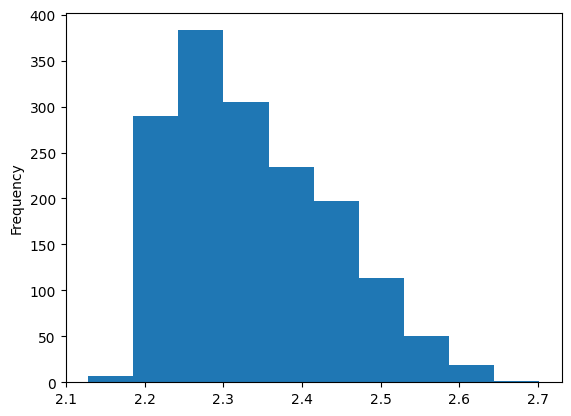

In [10]:
y.plot(kind='hist')

<Axes: >

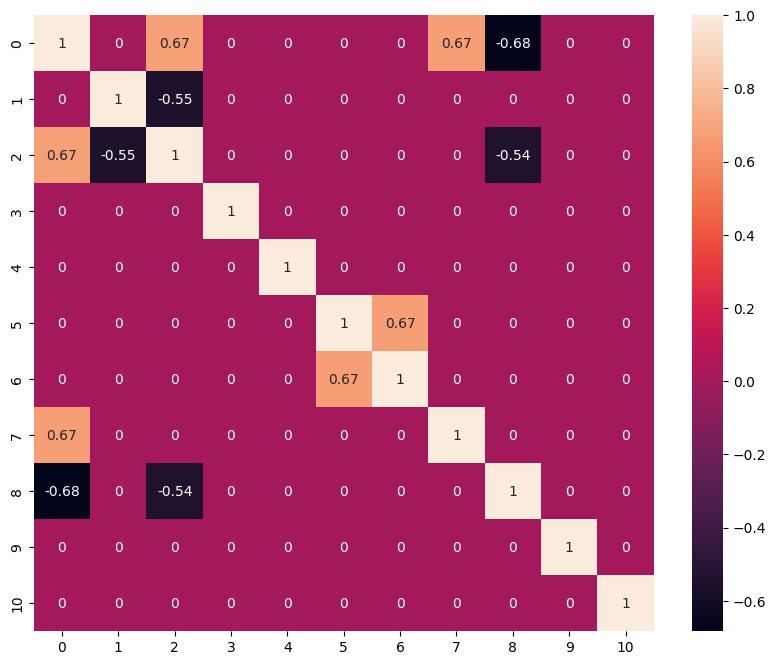

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(np.where(np.abs(X.corr())>0.5,X.corr(),0),annot=True,color='red')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('RMSE', root_mean_squared_error(y_test,y_pred))
print('R2', r2_score(y_test,y_pred))
print('MAPE', mean_absolute_percentage_error(y_test,y_pred))

RMSE 0.0599479288706826
R2 0.6414908626951087
MAPE 0.020147996076300707


In [20]:
y_train

655     2.240710
116     2.302585
1465    2.272126
1170    2.351375
664     2.322388
          ...   
404     2.208274
439     2.230014
619     2.230014
1227    2.261763
1078    2.397895
Name: alcohol, Length: 1279, dtype: float64

In [15]:
import sklearn

In [16]:
sklearn.__version__

'1.6.1'